# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [43]:
import kagglehub
import os
import pandas as pd
from sklearn.cluster import DBSCAN

In [44]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [45]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [46]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [48]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000



How many Pokémon are in the dataset? (2 pts)


In [49]:
#There are 800 entries of pokemon in the datasets


List all columns available (3 pts)

In [50]:
#there are 13 columns

In [51]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [52]:
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
data_features = df[features]
data_features.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


Are there any missing values? (2 pts)

In [53]:
df.isna().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


If missing values exist, describe how you handled them (3 pts)

In [54]:
df["Type 2"] = df["Type 2"].fillna("none")
print(df["Type 2"].value_counts())
df.info()

Type 2
none        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)


scaled_df = pd.DataFrame(scaled_features, columns=data_features.columns)
scaled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

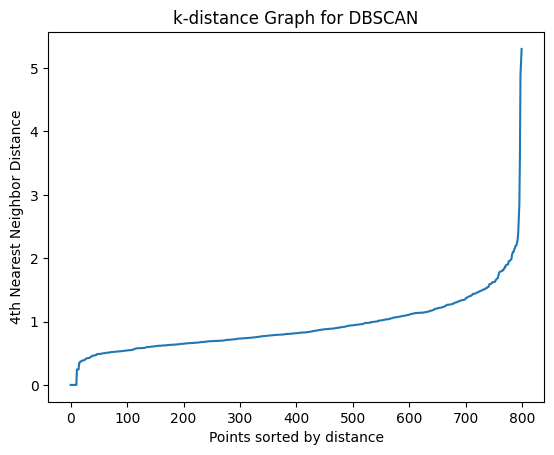

In [56]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(scaled_df)
distances, _ = neighbors.kneighbors(scaled_df)

k_distances = np.sort(distances[:, 3])
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.title('k-distance Graph for DBSCAN')
plt.show()

What is your chosen eps based on the "elbow"? (2 pts)

In [57]:
import numpy as np

y = np.array(k_distances)
x = np.arange(len(y))

p1 = np.array([x[0], y[0]])
p2 = np.array([x[-1], y[-1]])

points = np.vstack((x, y)).T
points_3d = np.hstack([points, np.zeros((points.shape[0], 1))])
p1_3d = np.append(p1, 0)
p2_3d = np.append(p2, 0)


line_vector = p2_3d - p1_3d
point_vectors = p1_3d - points_3d
cross_products = np.cross(line_vector, point_vectors)
norm_cross_products = np.linalg.norm(cross_products, axis=1)
norm_line_vector = np.linalg.norm(line_vector)

distances = norm_cross_products / norm_line_vector

elbow_index = np.argmax(distances)
optimal_eps = y[elbow_index]

print("Optimal eps:", optimal_eps)

if 1.4 <= optimal_eps <= 2.0:
    print("Accepted eps:", optimal_eps)
else:
    print("Fallback to visual range")

Optimal eps: 1.5248638064269173
Accepted eps: 1.5248638064269173


One-sentence explanation of your reasoning (2 pts)

In [58]:
# I chose eps 1.5 because the k-distance plot shows the start of the big curvature around 1.3–1.4 and remains stagnant at 2.0

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [59]:
min_samples = [4, 6, 8, 10, 12, 15]

for min_sample in min_samples:
    db = DBSCAN(eps=1.5, min_samples=min_sample, metric="euclidean")
    db.fit(scaled_df)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"min_samples={min_sample}: clusters={n_clusters}")

min_samples=4: clusters=1
min_samples=6: clusters=2
min_samples=8: clusters=1
min_samples=10: clusters=1
min_samples=12: clusters=1
min_samples=15: clusters=1


In [60]:
#min_samples = 6 has 2 clusters.

How many Pokémon were labeled as noise? (4 pts)

In [61]:
min_samples_list = [6]
eps = 1.5

for min_samples in min_samples_list:
    db = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
    db.fit(scaled_df)
    labels = db.labels_
    n_noise = list(labels).count(-1)
    print(f"min_samples={min_samples}: noise points = {n_noise}")

min_samples=6: noise points = 44


In [62]:
#min_sample = 6 gives us 44 noise

Show the unique labels output by DBSCAN (2 pts)

In [63]:
print("Unique labels:", np.unique(labels))

Unique labels: [-1  0  1]


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [64]:
df['cluster'] = db.labels_

Show the first 10 rows including the cluster label (4 pts)

In [65]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,none,405,58,64,58,80,65,80,1,False,0
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0
9,7,Squirtle,Water,none,314,44,48,65,50,64,43,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [66]:
df["cluster"].value_counts()

,count
cluster,
0,750
-1,44
1,6


What are the average Attack, Defense, and Speed? (4 pts)


In [67]:
df.groupby("cluster")[["Attack", "Defense", "Speed"]].mean()

,Attack,Defense,Speed
cluster,,,
-1,104.545455,88.909091,73.886364
0,77.665333,72.318667,68.068000
1,58.666667,153.833333,53.333333


In [67]:
#77.665333 attack, 72.318667 defense, s68.068000 speed

Compare the clusters: What differences do you notice? (4 pts)

In [68]:
#the outlier pokemons has a very high attack, high defense and moderate speed
#cluster 1  has equal balance stats, speed also fall a few points behind
#cluster 2 has very high defense stat

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [69]:
df[df["cluster"] == -1]
df[df["cluster"] == -1]["Name"]

,Name
19,BeedrillMega Beedrill
44,Jigglypuff
71,AlakazamMega Alakazam
87,SlowbroMega Slowbro
103,Onix
121,Chansey
155,Snorlax
163,MewtwoMega Mewtwo X
164,MewtwoMega Mewtwo Y
196,AmpharosMega Ampharos


In [70]:
legendary_outliers = df[(df["cluster"] == -1) & (df["Legendary"] == True)]
print(legendary_outliers[['Name', 'Legendary', 'cluster']])
print(f"Number of legendary outliers: {legendary_outliers.shape[0]}")

                      Name  Legendary  cluster
163    MewtwoMega Mewtwo X       True       -1
164    MewtwoMega Mewtwo Y       True       -1
269                  Lugia       True       -1
414               Regirock       True       -1
415                 Regice       True       -1
422    KyogrePrimal Kyogre       True       -1
424  GroudonPrimal Groudon       True       -1
426  RayquazaMega Rayquaza       True       -1
428     DeoxysNormal Forme       True       -1
429     DeoxysAttack Forme       True       -1
431      DeoxysSpeed Forme       True       -1
544  GiratinaAltered Forme       True       -1
796    DiancieMega Diancie       True       -1
798     HoopaHoopa Unbound       True       -1
Number of legendary outliers: 14


Are many of them legendary? (3 pts)

In [71]:
#14 legendaries

Explain why DBSCAN might classify them as outliers (3 pts)

In [72]:
legendary_outliers = df[(df["cluster"] == -1) & (df["Legendary"] == True)]

# View Name, Legendary flag, cluster, and stats
print(legendary_outliers[['Name', 'Legendary', 'cluster', 'Attack', 'Defense', 'Speed']])

# Number of legendary outliers
print(f"Number of legendary outliers: {legendary_outliers.shape[0]}")


                      Name  Legendary  cluster  Attack  Defense  Speed
163    MewtwoMega Mewtwo X       True       -1     190      100    130
164    MewtwoMega Mewtwo Y       True       -1     150       70    140
269                  Lugia       True       -1      90      130    110
414               Regirock       True       -1     100      200     50
415                 Regice       True       -1      50      100     50
422    KyogrePrimal Kyogre       True       -1     150       90     90
424  GroudonPrimal Groudon       True       -1     180      160     90
426  RayquazaMega Rayquaza       True       -1     180      100    115
428     DeoxysNormal Forme       True       -1     150       50    150
429     DeoxysAttack Forme       True       -1     180       20    150
431      DeoxysSpeed Forme       True       -1      95       90    180
544  GiratinaAltered Forme       True       -1     100      120     90
796    DiancieMega Diancie       True       -1     160      110    110
798   

In [73]:
#DBSCAN identifies these pokemon as outliers because theres unbalance stat distribution some have higher attack, defense, and speed while falling short on other stats which cause them to be in low density regions leading not having enough neighbors.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:

In [74]:
types_long = pd.concat([
    df[["cluster", "Type 1"]].rename(columns={"Type 1": "Type"}),
    df[["cluster", "Type 2"]].rename(columns={"Type 2": "Type"})
]).dropna()

types_no_none_values = types_long[types_long["Type"] != "None"]

types_no_none_values.groupby(["cluster", "Type"]).size().sort_values(ascending=False)

cluster  Type    
 0       none        362
         Water       121
         Flying       98
         Normal       95
         Grass        94
         Psychic      77
         Bug          68
         Ground       63
         Poison       61
         Fire         61
         Dark         50
         Rock         50
         Electric     49
         Fighting     49
         Dragon       47
         Steel        42
         Ghost        41
         Fairy        37
         Ice          35
-1       none         22
         Psychic      12
         Normal        7
         Water         5
         Rock          5
         Fighting      4
         Ghost         4
         Ground        4
         Bug           4
 1       Steel         4
-1       Steel         3
 1       Rock          3
-1       Ice           3
         Fire          3
         Dragon        3
         Flying        3
         Fairy         2
 1       none          2
-1       Grass         1
         Dark          1
         Electric      1
         Poison        1
 1       Fairy         1
         Ghost         1
         Psychic       1
dtype: int64


What types of Pokémon grouped together (5 pts)

In [75]:
#Cluster 0 has a dense population of Pokémon, with many having no secondary type and common types including Water, Flying, Normal, Grass, Psychic, Bug, Ground, Poison, Fire, Dark, Rock, Electric, Fighting, Dragon, Steel, Ghost, Fairy, and Ice.

In [76]:
# cluster 1 majority has rock and steel pokemons which has a higher defense stat dbscan grouped together high defense type pokemons.

In [77]:
# outliers are psychic, dark and dragon and also other megas, which indicate dbscan scan group them together basing on their overall high base stat due to their low density

#cluster 1 contains steel, rock types and other newer gen types like faries

Whether the clusters make intuitive sense (10 pts)

In [78]:
#cluster 0 group the common type pokemons in the dataset
#cluster 1 group the pokemons steel and rock types which has high defense stat making them distinct to the others
#outliers mostly consist of mega evolutions legendarys, mythic, and special type of pokemons, it also included very high stat pokemons that has no neighbors which can indicate its special stat and rarity


What the noise points reveal about DBSCAN (5 pts)


In [79]:
#it highlighted datapoints that do not belong to a dense region, many of them are unique, rare, high stat and legendaries DBSCAN was able to isolate these points to indetify them with the use of the chose eps radius.

What stat patterns you discovered (5 pts)

In [80]:
#clustering reveals grouped of pokemons stats and types values, with the help dbscan it help us to indetify outliers of unique points of a pokemon
#clustering help us identify 2 distinct clusters with outliers  cluster 0 consist of the regular stats and types, while cluster 1 help us identify that some types has a very high endurance while outliers are special ones
#DBSCAN grouped them basing on the its datapoint similarities and overall stat profiles.